# CSCE 623 Homework Assignment 3
## Student Name: Marvin Newlin
## Date: 30 Apr 19


In [31]:
"""
HW1
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

#------ADDITIONAL STUDENT IMPORTS----------------
#put student imports below this line
from matplotlib import gridspec

## STEP 0 (helper functions):
Instructor provided code for data generation & polynomial feature generation


 CHECKING MAKEDATA (Quantity = 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
x    5 non-null float64
y    5 non-null float64
dtypes: float64(2)
memory usage: 160.0 bytes


          x          y
0 -0.331912  -1.658178
1  0.881298  -2.326590
2 -1.999543 -12.359352
3 -0.790670  -0.905642
4 -1.412976  -6.422995

 CHECKING POLY DESIGN MATRIX
[[ 1.         -0.33191198  0.11016556 -0.03656527]
 [ 1.          0.88129797  0.77668612  0.6844919 ]
 [ 1.         -1.9995425   3.99817021 -7.99451126]
 [ 1.         -0.79066971  0.62515859 -0.49429396]
 [ 1.         -1.41297644  1.99650241 -2.82101086]]


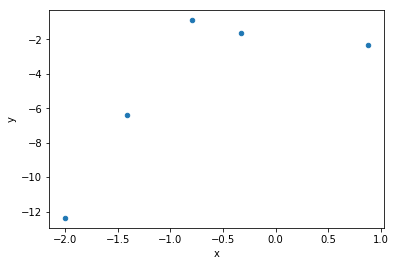

In [32]:
#STEP 0 -  instructor provided

def makeData(myseed=1, quantity = 100):
    np.random.seed(myseed)
    x = np.random.uniform(low=-2.,high=2.,size=quantity)  
    y = x - 2 * (x ** 2) + np.random.normal(size=quantity)
    df = pd.DataFrame({'x': x, 'y': y})
    return(df) 


def polyDesignMatrix(x, p):
    '''returns a polynomial design (numpy) matrix from a single feature column vector x.
    The return matrix contains columns of x**0, x**1, … x**p 
    where p is the desired highest order of the polynomial.'''
    x = np.array(x)  
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return(X)


#test the function
print("\n CHECKING MAKEDATA (Quantity = 5)")
checkdata = makeData(quantity = 5)
print("\n")
checkdata.info()
checkdata.head()
print("\n")
print(checkdata)
checkdata.plot.scatter(x='x', y='y')
print("\n CHECKING POLY DESIGN MATRIX")
checkpoly = polyDesignMatrix(checkdata['x'],3)
print(checkpoly)



## STEP 1 (data generation and description):

In [33]:
df1=makeData()

# STUDENTS: add code to display the answers to question 1 in this cell and/or a markdown cell below
display(md("#### Number of Observations"))
print(df1.count())



#### Number of Observations

x    100
y    100
dtype: int64


As we can see from the output above, there are $n=100$ observations. Additionally, there is only one predictor for this dataset.

## STEP 2 (scatterplot and description):

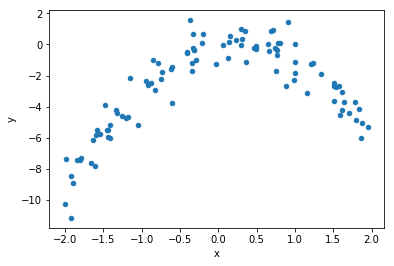

In [34]:
#---ADD STUDENT CODE HERE
df1.plot.scatter('x', 'y')

Based on the scatterplot above, the shape of the data appears to be a parabola. Based on this,
I would presume that an order 2 polynomial model will best fit the data. 

#### Official Hypothesis
An order 2 polynomial model will provide the best fit for this dataset.


## STEP 3 (Ordinary least squares):

The solution to OLS can be viewed generally as solving a linear equation, $y = X\beta$. For OLS, we know $X$ and we know $y$. Since our matrix $X$ is not guaranteed to be invertible, we multiply both sides of the equation on the left by $X^T$ to obtain a symmetric matrix. We can then solve for $\beta$ by multiplying on the left by $X^TX$ yielding $$ \beta = (X^TX)^{-1}X^Ty $$

In [35]:
def getOLScoefficients(X, y):
    '''computes and returns the OLS coefficients (betas) from design matrix X
    and response variable y.  Returns a ROW VECTOR of betas
    First column of design matrix should contain only values equalling 1.'''
    betas = []  
    #----STUDENT - INSERT CODE HERE TO COMPUTE BETAS
    x_sym = np.dot(X.T, X)
    x_sym_inv = np.linalg.inv(x_sym)
    betas = np.dot(x_sym_inv,np.dot(X.T,y))
    return(betas)

def getOLSpredictions(X, betas):
    '''computes and returns the OLS predictions (yhat) from design matrix X
    and ROW VECTOR betas.  yhat will be a column vector.
    First column of design matrix should contain only values equalling 1.'''
    predictions = []  
    #----STUDENT - INSERT CODE HERE TO COMPUTE PREDICTIONS
    predictions = np.dot(X,betas.T) # n x (p+1) * (p+1) x 1 --> n x 1 column vector
    return(predictions)

## STEP 4 (implement LOOCV as a function):

In [36]:
def LOOCVerr(df, modelOrder):
    #---STUDENT - MODIFY THE CODE HERE---
    num_observations = len(df.index)
    error = np.zeros((num_observations,1))
    for i in range(0,num_observations):
        loocv_df = df.drop([i], axis=0)
        X = polyDesignMatrix(loocv_df['x'], modelOrder) # Create design matrix
        betas = getOLScoefficients(X, loocv_df['y'])    # Solve OLS for coefficients
        y_hat = getOLSpredictions(X,betas)              # Get predictions
        y_diff = y_hat - loocv_df['y']                  # calculate error for each term
        squared_error = np.multiply(y_diff,y_diff)      # square the error 
        mse_i = squared_error.sum()/len(squared_error)
        error[i,0] = mse_i
    
    errorvec = error # Vector containing MSE for each iteration of LOOCV
    return errorvec 

## STEP 5 (compute LOOCV errors on polynomial model orders 1,2,3,4):

In [37]:
#---ADD STUDENT CODE HERE
LOOCV_runs = []
for i in range(1,5):
    error_vec = LOOCVerr(df1, i)
    LOOCV_runs.append(error_vec)
    


## STEP 6 (plot LOOCV MSE as a function of model order ):

Order 1 MSE:	6.201337
Order 2 MSE:	0.790007
Order 3 MSE:	0.786902
Order 4 MSE:	0.785362


Text(2.5, 1.785361582463006, 'Minimum MSE (4, 0.785)')

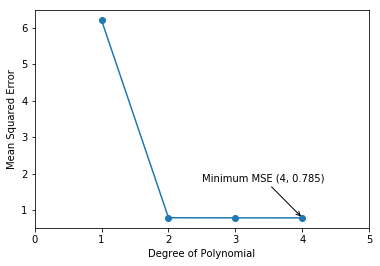

In [38]:
#---ADD STUDENT CODE HERE
num_samples = len(df1.index)
linear_mse = LOOCV_runs[0].sum()/num_samples
quadratic_mse = LOOCV_runs[1].sum()/num_samples
cubic_mse = LOOCV_runs[2].sum()/num_samples
quartic_mse = LOOCV_runs[3].sum()/num_samples

mse_all = np.array([linear_mse, quadratic_mse, cubic_mse, quartic_mse])
min_mse = np.min(mse_all)
min_index = 0
for i in range(0,4):
    if min_mse == mse_all[i]:
        min_index = i
        
min_point = (min_index+1, min_mse)

for i in range(1,5):
    print('Order %d MSE:\t%f' %(i, mse_all[i-1]))


fig1 = plt.figure()
ax1 = plt.subplot()
x_axis = np.arange(1,5)
ax1.plot(x_axis, mse_all, '-o')
ax1.set_ylabel('Mean Squared Error')
ax1.set_xlabel('Degree of Polynomial')
ax1.set_xlim(0,5)
ax1.annotate('Minimum MSE (%d, %.3f)' %(min_point), xy=min_point, xytext=(min_point[0]-1.5, min_point[1]+1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))


Interestingly, the order 4 model actually has the lowest MSE with an MSE of 0.785. However, the difference between the hypothesized model order, order 2, and the actual minimum MSE order of 4 is 0.005. Thus, the difference between the error in the order 2 model and order 4 model is a very small amount. This makes sense though since a quartic and a quadratic can be very close in form.


## STEP 7 (implement valset as a function):

This function takes in a dataframe, the desired model order, and a seed for random generation.
The function then splits the provided dataframe in half one half for training and one half for validation.
The function then fits an OLS model on the training set and calculates the MSE on the validation set and returns the MSE from the validation set.

In [39]:
def VALSETerr(df,modelOrder,splitseed): 
    mse = []
    #---ADD STUDENT CODE HERE
    val_df = df.sample(frac=0.5, random_state=splitseed)
    train_df = df
    for i in val_df.index:
        train_df = train_df.drop([i]) # Remove elements that were selected for the validation set
    #End for
    train_X = polyDesignMatrix(train_df['x'], modelOrder)
    val_betas = getOLScoefficients(train_X, train_df['y']) # Get coefficients based on training set
    val_X = polyDesignMatrix(val_df['x'], modelOrder)
    val_yhat = getOLSpredictions(val_X, val_betas)        # Make predictions on Validation set
    val_y_diff = val_yhat - val_df['y']
    val_ydiff_squared = np.multiply(val_y_diff, val_y_diff)
    val_mse = val_ydiff_squared.sum()/len(val_df.index)
    mse = val_mse    
    return mse

## STEP 8 (implement k-fold cross-validation as a function):

$k$-fold cross validation computes k MSE estimates using the $k^{th}$ fold as as a validation set and the remaining $k-1$ folds as the training set. This function computes and returns a vector of size k where the $i^{th}$ entry of the vector is the $i^{th}$ MSE estimate: $$\frac{1}{k}\sum_{i=1}^k MSE_i$$

In [40]:
def KFOLDerr(df,modelOrder,k,splitseed):
    errorterms = []
    #---ADD STUDENT CODE HERE
    initial_df = df
    num_samples = len(df.index)
    kf_count = int(np.ceil(num_samples/k)) # This will be n/k if n%k is 0 and otherwise will be n//k + 1
    kfold_df_list = []
    # Split dataset into k folds
    for i in range(k-1):
        kfold_df = df.sample(kf_count, random_state=splitseed) #Sample n//k points from the frame
        kfold_df_list.append(kfold_df)
        df = df.drop([idx for idx in kfold_df.index])  # remove sampled points so they aren't resampled

    # End for
    kfold_df_list.append(df)    # last fold. This fold will have n%k elements if k not divisible by n
    
    # Perform k-fold cross val
    for i in range(k):
        curr_fold = kfold_df_list[i] # Validation fold
        other_folds = initial_df.drop([idx for idx in curr_fold.index]) # remove elements of the current fold
        kf_X_train = polyDesignMatrix(other_folds['x'], modelOrder) # Create design matrix from remaining folds
        kf_betas = getOLScoefficients(kf_X_train, other_folds['y'])  # Fit model on all other folds but current 
                                                                     # fold
        
        kf_X = polyDesignMatrix(curr_fold['x'], modelOrder)  # Create deesign matrix for val fold
        kf_yhat = getOLSpredictions(kf_X, kf_betas)          # Make predictions on validation fold
        kf_ydiff = kf_yhat - curr_fold['y']                  # Calculate error
        kf_ydiff_squared = np.multiply(kf_ydiff, kf_ydiff)
        mse_i = kf_ydiff_squared.sum()/np.size(kf_ydiff_squared, 0) # calculate MSE of ith row
        errorterms.append(mse_i)
    return errorterms

## STEP 9 (compute and collect MSEs from validation methods):

To implement this, we iterate through each seed from 1-10 and within each seed iteration, we iterate through the 
model orders 1-4 calculating the mse for each of the 3 methods and storing the result into its respective list.
The results are stored in a 10x4 2D list for each method.


In [41]:
#---ADD STUDENT CODE HERE
valset_mse_list_2d = []
five_fold_mse_list_2d = []
ten_fold_mse_list_2d = []

valset_mse_list = []
five_fold_mse_list = []
ten_fold_mse_list = []

for seed in range(1,11):
    valset_mse_list = []
    five_fold_mse_list = []
    ten_fold_mse_list = []
    for order in range(1,5):
        valset_mse = VALSETerr(df1, order, seed)
        valset_mse_list.append(valset_mse)
        five_fold_mse = KFOLDerr(df1, order, 5, seed)
        five_fold_mse  = np.array(five_fold_mse).mean()
        five_fold_mse_list.append(five_fold_mse)
        ten_fold_mse = KFOLDerr(df1, order, 10, seed)
        ten_fold_mse = np.array(ten_fold_mse).mean()
        ten_fold_mse_list.append(ten_fold_mse)
    valset_mse_list_2d.append(valset_mse_list)
    five_fold_mse_list_2d.append(five_fold_mse_list)
    ten_fold_mse_list_2d.append(ten_fold_mse_list)   
    
# Display Sizes    
valset_size = len(valset_mse_list_2d)*len(valset_mse_list)
five_fold_size = len(five_fold_mse_list_2d)*len(five_fold_mse_list)
ten_fold_size = len(ten_fold_mse_list_2d)*len(ten_fold_mse_list)
display(md("Number of Validation set MSE's: %d" %valset_size))
display(md("Number of 5-fold Cross Validation MSE's: %d" %five_fold_size))
display(md("Number of 10-fold Cross Validation MSE's: %d" %ten_fold_size))

Number of Validation set MSE's: 40

Number of 5-fold Cross Validation MSE's: 40

Number of 10-fold Cross Validation MSE's: 40

As we can see from the above sizes, we calculate 40 MSE's for each model.

## STEP 10 (build "spaghetti" plots of cross validation results):

Text(0.5, 1.0, '10-fold Cross Validation')

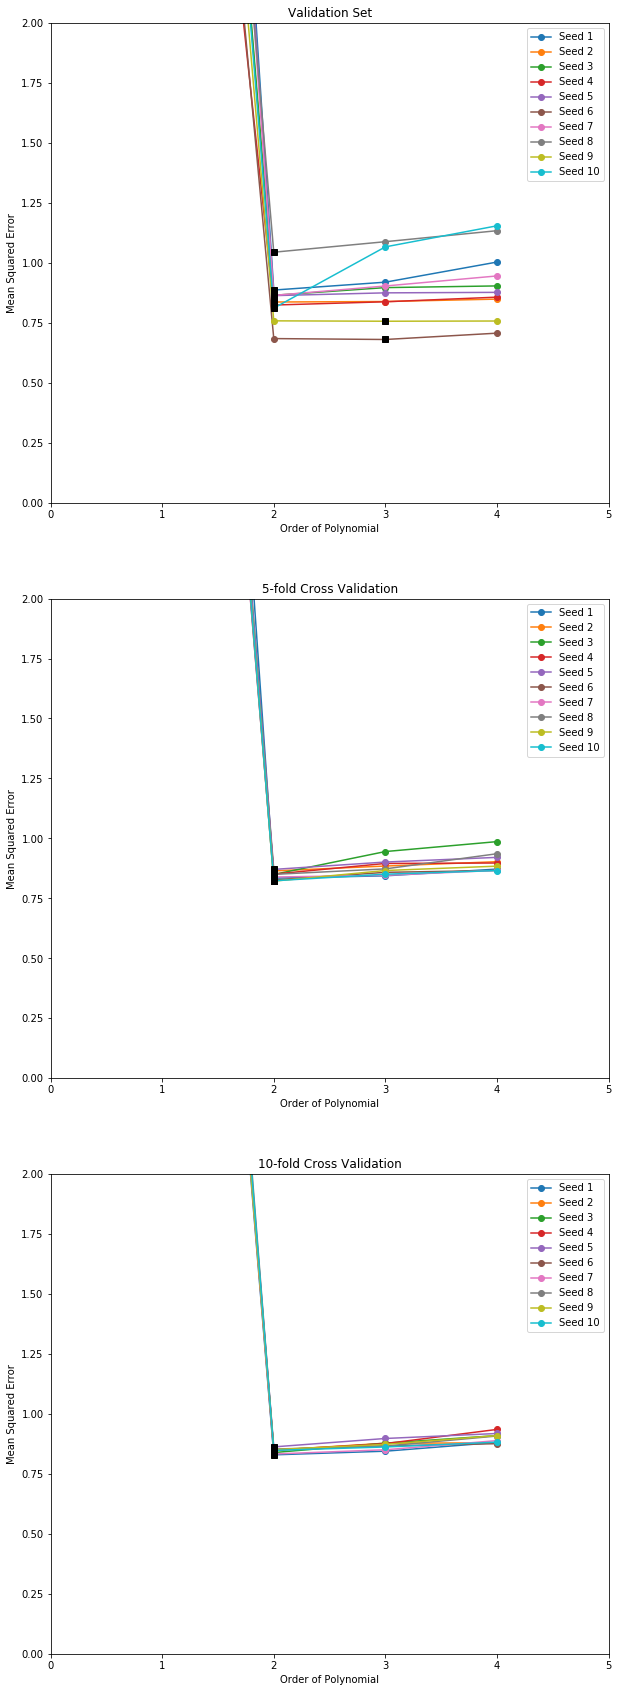

In [42]:
#---ADD STUDENT CODE HERE
val = np.array(valset_mse_list_2d).T
five_fold = np.array(five_fold_mse_list_2d).T
ten_fold = np.array(ten_fold_mse_list_2d).T

# Find minimum MSE for each seed line in validation set
min_mse_seeds_val = []
for i in range(10):
    min_val = 100
    min_index = 0
    curr_col = val[:,i]
    for x in range(4):
        if curr_col[x] < min_val:
            min_val = curr_col[x]
            min_index = x+1
    min_point = (min_index, min_val)
    min_mse_seeds_val.append(min_point)

# Find minimum MSE for each seed line in 5-fold set
min_mse_seeds_five = []
for i in range(10):
    min_val = 100
    min_index = 0
    curr_col = five_fold[:,i]
    for x in range(4):
        if curr_col[x] < min_val:
            min_val = curr_col[x]
            min_index = x+1
    min_point = (min_index, min_val)
    min_mse_seeds_five.append(min_point)


# Find minimum MSE for each seed line in 10-fold set
min_mse_seeds_ten = []
for i in range(10):
    min_val = 100
    min_index = 0
    curr_col = ten_fold[:,i]
    for x in range(4):
        if curr_col[x] < min_val:
            min_val = curr_col[x]
            min_index = x+1
    min_point = (min_index, min_val)
    min_mse_seeds_ten.append(min_point)


# Create figure and layout
fig2 = plt.figure(figsize=(10, 30))
gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[2,0])
x_axis = np.arange(1,5)

seedlist = ['Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7',
           'Seed 8', 'Seed 9', 'Seed 10']

# Plot figures
for i in range(10):
    ax1.plot(x_axis, val[:,i], '-o', label='Seed %d' %(i+1))
    ax2.plot(x_axis, five_fold[:, i], '-o', label='Seed %d' %(i+1))
    ax3.plot(x_axis, ten_fold[:, i], '-o', label='Seed %d' %(i+1))
ax1.legend()
ax2.legend()
ax3.legend()

#Plot minimum MSE points on validation set
for point in min_mse_seeds_val:
    ax1.plot(point[0], point[1], 'ks')
    
#Plot minimum MSE points on five set
for point in min_mse_seeds_five:
    ax2.plot(point[0], point[1], 'ks')
    
#Plot minimum MSE points on ten set
for point in min_mse_seeds_ten:
    ax3.plot(point[0], point[1], 'ks')

# Set axis labels
for ax in fig2.axes:
    ax.set_xlim(0,5)
    ax.set_ylim(0,2)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Order of Polynomial')

# Set titles
ax1.set_title('Validation Set')
ax2.set_title('5-fold Cross Validation')
ax3.set_title('10-fold Cross Validation')


The three figures above display the spaghetti plots for each method. One thing to notice is that the MSE values for the order 1 polynomials are not visible. This is because the differences in the spaghetti plots were not noticable without zooming in to the interval [0,2] on the y-axis.

The black squares indicate the minimum MSE point on each line.

## STEP 11 (human estimate of most reliable validation technique):

The 10-fold cross validation technique appears to be the most reliable. This is because the minimum MSE points for each seed on the spaghetti are in nearly the same spot. This means that regardless of the random sample, the minimum MSE and the model order that obtains the minimum MSE are consistently in nearly the same area. 

From a mathematical standpoint, we can visualize the highest reliabilty as the technique which has the least amount of variance between both the minimum MSE and the model order. In the Validation Set technique, we see that there is a large amount of variance between the minimum MSE values and in some cases the order 3 model had the minimum MSE. 5-fold cross validation has very little variance in the minimum MSE values and all of these occured at the order 2 model. However, looking at the 10-fold cross validation technique, it appears almost as if the black squares are all one square with how close the markers are together. Thus, visually, the 10-fold cross validation technique has the lowest variance in the minimum MSE value. This makes 10-fold cross validation the most reliable validation technique. 

## STEP 12 (algorithmic determination of best-order model from most reliable val method) :

In Step 11 we determined that 10-fold cross validation was the most reliable technique. We now pick the best order model from the models that we have built with 10-fold cross validation.

In [43]:
#---ADD STUDENT CODE HERE
best_technique = np.array(ten_fold_mse_list_2d).T
min_list = []
# Iterate through the 10 different seeds to find minimum MSE and corresponding model order
for i in range(10):
    min_val = 100
    min_index = 0
    curr_col = best_technique[:,i]
    for x in range(4):
        if curr_col[x] < min_val:
            min_val = curr_col[x]
            min_index = x+1
    min_point = (min_index, min_val)
    min_list.append(min_point)
total_min = 100
total_min_index = 0
# Iterate through the minimums from each seed and pich the minimum
for i in range(10):
    curr_point = min_list[i]
    if curr_point[1] < total_min:
        total_min = curr_point[1]
        total_min_index = curr_point[0]
    
display(md("Best order model: %d" %total_min_index))
display(md("Minimum MSE for best order model: %.3f" %total_min))

Best order model: 2

Minimum MSE for best order model: 0.830